In [2]:
#import statements listed below
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import scipy
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#1 a:
covarience_matrix_a = np.array(np.mat('5 .8 -.3; .8 3 .6; -.3 .6 4')) #Input the covarience matrix given in 1 a
matrix_a = np.random.multivariate_normal([1,2,1], covarience_matrix_a, size = 300) #generate the random normal distribution that is size 300 and mean vector of [1,2,1].t

print(matrix_a.shape)

#print statements
print("covarience Matrix input : \n", covarience_matrix_a)
print("matrix Generated: \n", matrix_a)

(300, 3)
covarience Matrix input : 
 [[ 5.   0.8 -0.3]
 [ 0.8  3.   0.6]
 [-0.3  0.6  4. ]]
matrix Generated: 
 [[ 0.16791316 -2.36696959 -2.9407721 ]
 [-0.28167607  3.96724484  2.22816505]
 [-1.79987147  3.14089805  4.42147133]
 [ 1.10349032  1.53422998 -0.10568217]
 [ 2.26490546  2.43967258 -2.36740569]
 [-0.19656114  5.36039313  3.69689764]
 [ 1.94267246  1.41439987 -0.97366169]
 [ 4.87310636  0.83739426  0.01646271]
 [ 0.87103994  1.57660729  3.45609458]
 [ 3.84051429  1.66861469  1.99893234]
 [ 3.35717536  2.14235486  1.7274003 ]
 [-0.45877513  2.33049962 -0.31647299]
 [ 0.73871114  3.70649282 -2.43220719]
 [ 0.78280921  1.75145294 -1.09439658]
 [ 6.42593247  3.95376425 -1.79123365]
 [ 4.87167587  4.35493824  2.18729738]
 [ 6.76058688  3.37494008  2.27330059]
 [ 4.95685555  2.19418088  0.6142502 ]
 [ 2.83315326 -0.49746421 -1.27058589]
 [-0.14482617  4.98207149  0.70004654]
 [ 0.46984806  3.61992767  2.59943258]
 [-0.94880667 -0.49643222 -0.72805037]
 [-1.04606945 -1.78544716 -1.2

Text(0.5, 1.0, 'A vs C')

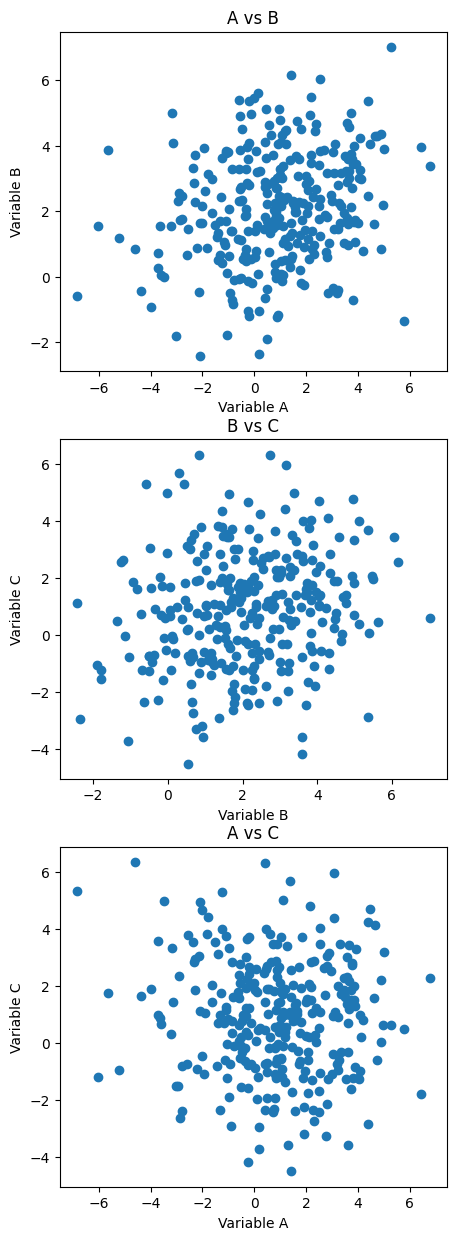

In [4]:
#1 b:

#below is the plotting the scatter plots of a'c a'b b'c
fig , axy = plt.subplots(3,1 , figsize = (5,15))
axy[0].scatter(matrix_a[:,0],matrix_a[:,1])
axy[0].set_xlabel("Variable A")
axy[0].set_ylabel("Variable B")
axy[0].set_title("A vs B")



axy[1].scatter(matrix_a[:,1],matrix_a[:,2])
axy[1].set_xlabel("Variable B")
axy[1].set_ylabel("Variable C")
axy[1].set_title("B vs C")



axy[2].scatter(matrix_a[:,0],matrix_a[:,2])
axy[2].set_xlabel("Variable A")
axy[2].set_ylabel("Variable C")
axy[2].set_title("A vs C")


In [5]:
#1 C:

#calculate the mean vector with numpy mean funciton on axis 0
mean_vector = np.mean(matrix_a, axis=0)
#calculate the covarience matrix of a by passing matrix of generated values and the row variable axis
covarience_matrix_a_after = np.cov(np.transpose(matrix_a), rowvar = True)

#print statements of the covarience and mean nparrays
print("covarience Matrix after: \n", covarience_matrix_a_after)
print("Mean Vector after: \n", mean_vector)

covarience Matrix after: 
 [[ 5.11151286  0.90981781 -0.34421501]
 [ 0.90981781  2.89264939  0.60226709]
 [-0.34421501  0.60226709  4.09833213]]
Mean Vector after: 
 [0.86310332 2.10884341 0.90909147]


In [6]:
#1 D i: calculating Eucdlidean and Mahalanobis dists

#calculating the euclidean distance by taking the second norm of the matrix a - mean vector (spanned) on axis 1
eucd_dists = np.linalg.norm((matrix_a - mean_vector), ord = 2, axis = 1)

#print the euclidean distances
print("Euclidean Distances: \n\n", eucd_dists)

#print and create and empty vector of shape rows of a , 1
rows_a, columns_a = matrix_a.shape
maha_dists = np.zeros(shape=(rows_a,1))

#calculating the maha distance of every row from the subtracting the mean vector from each row then mulitpling by the inverse covarience matrix then the subtracted statement transpose
for i in range(rows_a):
  sub_a_mean = matrix_a[i,:] - mean_vector
  maha_dists[i] = np.matmul(np.matmul(sub_a_mean,  np.linalg.inv(covarience_matrix_a_after)), sub_a_mean.T)

#print statements below
print("\nMahalanobis distances: \n\n", maha_dists)

Euclidean Distances: 

 [5.94454715 2.55031975 4.52696188 1.19068553 3.57909637 4.41217946
 2.27870156 4.30040619 2.60203058 3.20102023 2.62509956 1.81617795
 3.70570287 2.03669817 6.45294946 4.7694241  6.18420405 4.10524313
 3.9274584  3.05205852 2.30114719 3.57081396 4.82965369 2.01508071
 5.41621249 3.67376405 1.54292934 3.02514816 2.97884798 2.22148683
 2.00872099 2.81748684 2.07680969 2.73820425 5.15261424 1.29566031
 2.93522952 2.4887328  2.84635769 2.05458097 4.47164986 3.61913429
 3.94253919 5.4598922  2.4635014  2.10312634 3.76133905 1.45970778
 3.07500828 1.30557751 2.32699847 3.6377553  2.37528865 1.34775953
 4.17687954 3.07143321 3.11719984 2.78021721 2.68667439 2.94903293
 1.6600275  3.02187592 1.01520856 3.66089724 0.6690874  3.82566706
 3.16187026 3.05709211 4.1524614  4.09860438 1.96813162 6.7792697
 3.52219579 4.31432399 2.98486943 5.61524263 2.97893369 4.49213363
 2.81467777 3.44252341 2.40304293 3.61858998 1.73637666 4.18027369
 4.40074111 0.39110388 3.16742212 2.914

Text(0.5, 0, 'Bins')

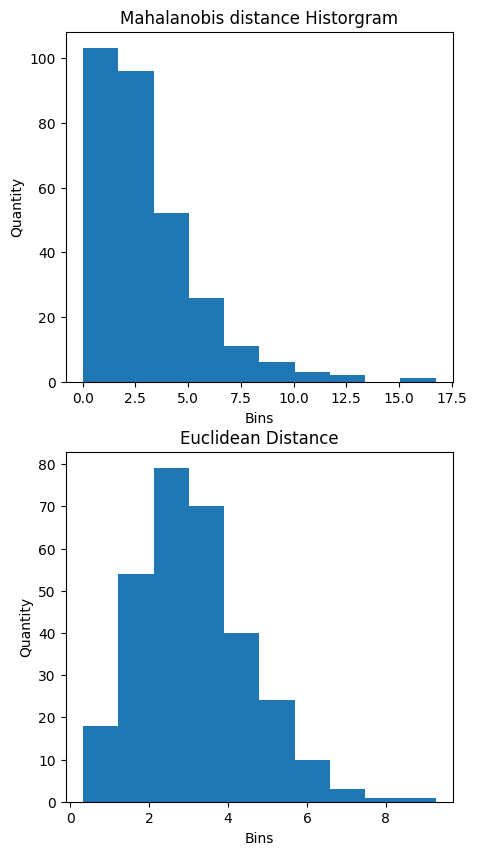

In [7]:
#1 d ii: histograms

#print the mahana dists and euclidean distance on the histograms
fig , axy = plt.subplots(2,1 , figsize = (5,10))

axy[0].hist(maha_dists)
axy[0].set_title("Mahalanobis distance Historgram")
axy[0].set_ylabel("Quantity")
axy[0].set_xlabel("Bins")


axy[1].hist(eucd_dists)
axy[1].set_title("Euclidean Distance")
axy[1].set_ylabel("Quantity")
axy[1].set_xlabel("Bins")

In [8]:
#2: import data from google drive

#import the data from greg's drive (if you try to run this the file path needs to be changed)
df = pd.read_excel('/content/drive/My Drive/HW Files/CSI5810/Wheat_Data.xlsx')

#print to verify the data was inputed correctly
print(df)

#dump the dataframe to a numpy array
wheat_matrix = df.to_numpy()

    feat1  feat2   feat3  feat4  feat5  feat6
0   15.26  14.84  0.8710  5.763  3.312  2.221
1   14.88  14.57  0.8811  5.554  3.333  1.018
2   14.29  14.09  0.9050  5.291  3.337  2.699
3   13.84  13.94  0.8955  5.324  3.379  2.259
4   16.14  14.99  0.9034  5.658  3.562  1.355
..    ...    ...     ...    ...    ...    ...
94  11.02  13.00  0.8189  5.325  2.701  6.735
95  11.55  13.10  0.8455  5.167  2.845  6.715
96  13.20  13.66  0.8883  5.236  3.232  8.315
97  16.23  15.18  0.8850  5.872  3.472  3.769
98  12.73  13.75  0.8458  5.412  2.882  3.533

[99 rows x 6 columns]


In [9]:
#2: print the covarience and mean vectors of the wheat data

#calculate the means of each feats and store in nparray
mean_vector_wheat = np.mean(wheat_matrix, axis=0)

#calculate the covarience matrix of the 6 feats from the wheat data
covarience_wheat_matrix_after = np.cov(np.transpose(wheat_matrix), rowvar = True)

#print to verify
print("covarience Matrix after: \n", covarience_wheat_matrix_after)
print("Mean Vector after: \n", mean_vector_wheat)


covarience Matrix after: 
 [[ 8.42715358e+00  3.70745018e+00  4.71469812e-02  1.20302176e+00
   1.07124568e+00 -1.04401721e+00]
 [ 3.70745018e+00  1.65083861e+00  1.82197397e-02  5.47227340e-01
   4.59726908e-01 -4.21084983e-01]
 [ 4.71469812e-02  1.82197397e-02  6.53623793e-04  4.20635245e-03
   7.76299929e-03 -1.51840645e-02]
 [ 1.20302176e+00  5.47227340e-01  4.20635245e-03  1.93049037e-01
   1.40964564e-01 -1.00880631e-01]
 [ 1.07124568e+00  4.59726908e-01  7.76299929e-03  1.40964564e-01
   1.45691920e-01 -1.57661014e-01]
 [-1.04401721e+00 -4.21084983e-01 -1.51840645e-02 -1.00880631e-01
  -1.57661014e-01  2.48604609e+00]]
Mean Vector after: 
 [14.92929293 14.6259596   0.86787374  5.66632323  3.25224242  3.75321414]


In [13]:
#3 i: create values to plot

#plug the covarience nparray into the linear alg eigen function to return the eigenvalues and eigenvectors
wheat_eigenvalues, wheat_eigenvectors = np.linalg.eig(covarience_wheat_matrix_after)

#store the top to wheat eigenvectors by returning the index of the best eigen values in the eigenvectors than taking those values from the transpose of the matrix
wheat_eigenvectors_transpose = np.transpose(wheat_eigenvectors)
top_2_eigenVectors = wheat_eigenvectors_transpose[(np.argsort(wheat_eigenvalues)[:2])]
print(top_2_eigenVectors, wheat_eigenvectors[0])
#caluclating the dot product by mulitpling the wheat matrix 2 best eigenvectors
dotprod_1_wheat = wheat_matrix.dot(wheat_eigenvectors[0])
dotprod_2_wheat = wheat_matrix.dot(wheat_eigenvectors[1])



[[ 1.84717801e-02 -5.43283528e-02 -9.93377847e-01 -1.24806470e-02
   9.87361285e-02 -1.75691701e-03]
 [-3.14925553e-01  4.34136660e-01  5.16894051e-02  1.23063516e-01
   8.33384978e-01 -5.58460505e-04]] [-0.89259967 -0.11893334  0.27116417  0.12677293 -0.31492555  0.01847178]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

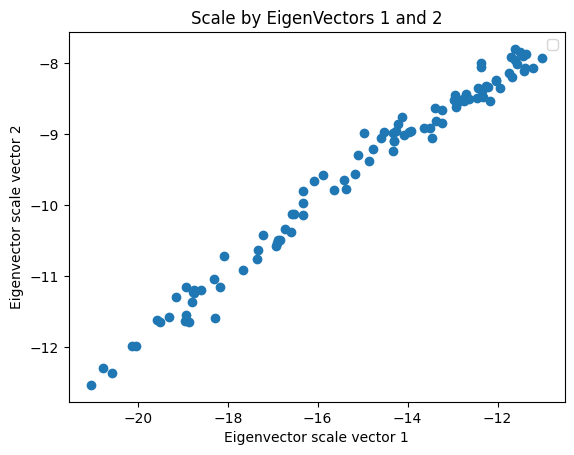

In [12]:
#created as simple scatter plot
plt.scatter(dotprod_1_wheat, dotprod_2_wheat)
plt.title("Scale by EigenVectors 1 and 2")
plt.xlabel("Eigenvector scale vector 1")
plt.ylabel("Eigenvector scale vector 2")
plt.legend()
plt.plot

In [ ]:
#4 i: import data

#line in file where data stops
lineseperator = 199522

#columns titles
columns_titles= ['AAGE','ACLSWKR','ADTIND','ADTOCC','AGI','AHGA','AHRSPAY','AHSCOL','AMARITL','AMJIND','AMJOCC','ARACE','AREORGN','ASEX','AUNMEM','AUNTYPE','AWKSTAT','CAPGAIN','CAPLOSS','DIVVAL','FEDTAX','FILESTAT','GRINREG','GRINST','HHDFMX','HHDREL','MARSUPWT','MIGMTR1','MIGMTR3','MIGMTR4','MIGSAME','MIGSUN','NOEMP','PARENT','PEARNVAL','PEFNTVTY','PEMNTVTY','PENATVTY','PRCITSHP','PTOTVAL','SEOTR','Target']

#read in the data
data = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/census.tar.gz', compression="gzip", nrows = lineseperator)
#dump into numpy
pd_m = data.to_numpy()



In [ ]:
#4 ii:
#make legend
legend = []
x,y = pd_m.shape

#run a loop for all the attributes and append all the found unique values to a legend
for i in range(y):
  legend.append(np.unique(pd_m[:,i]))
  print(i, legend[i] ,'\n')


In [ ]:
#reduce rows(aggregation) that seem redundent to categorizing the income

#after looking roughly at the attributes I picked the sets of data that seemed to have major diffrence
pd_2_attributes = ['age','grade','marriage Status','major industry code','major occupation code','race','sex','union participation','parential status','citizenship','Wealth thresehold']
pd_m_2 = pd_m[:,[0,4,7,8,9,10,12,13,31,35,41]]
legend2 = []

#recalculated the unique values (forgot I had already did this earlier in the code)
x,y = pd_m_2.shape
for i in range(y):
  legend2.append(np.unique(pd_m_2[:,i]))


In [ ]:
#create a seperate data set with the desired attributes with below $50000
pd_m_2_below = np.array(pd_m_2[np.where(pd_m_2[:,10]==" - 50000."),:]).T

#verify the nparray was populated with the correct values
print(pd_m_2_below.shape)

In [ ]:
#Histograms of each of the choosen categories from the 199522 data points
fig , axy = plt.subplots(5,2 , figsize = (10,50))

#counters i and j are used a cords for postioning the histograms while k is for the attribute value
i = 0
j = 0
k = 0


for j in range(5):
  for i in range(2):
    k = i*5+j
    #set the quantity of bins per attribute to all the unique values unless the bin count exceeds 24
    bins_axy = len(legend2[k])
    if bins_axy > 25:
      bins_axy = 25

    #create a stacked historgram with the values
    axy[j,i].hist([pd_m_2[:,k],pd_m_2_below[k,:,0]], color=['#4144cc','#eb9934'], bins = bins_axy,stacked = True,rwidth = .9)
    axy[j,i].set_xticklabels(axy[j,i].get_xticklabels(),rotation=25, ha='right')
    axy[j,i].set_xlabel(pd_2_attributes[k])
    axy[j,i].set_ylabel("quantity")
    axy[j,i].set_title(pd_2_attributes[k])
    axy[j,i].legend(["Below $50000", "Above $50000"])


When looking at the data for the first time the header (ironically found in the middle of the file) tries to train a model to distinct between those that earn above and below $50000, without income data. Plotting the data on logorithmic histograms you can compare those that fall under 50000 and those above 50000 in other categories. Some of the listed feats shows relationships between those above 50000 and those below 50000, such as unions and citizenship. Being in a union and having citizenships shows that you have a correlation (not causation) to having more people in you class to have +50000.  